
# Förutsäga hjärt- och kärlsjukdomar

## Introduktion
Denna rapport ger en kort demonstration av hur hjärt- och kärlsjukdomar kan förutsägas med hjälp av maskininlärning. Datat hämtas från [Kaggle (Cardiovascular Disease dataset Svetlana Ulianova)](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data). Efter att orimliga värden, såsom negativa värden för blodtryck, vikt och längd, har filtrerats bort återstår cirka 69000 datapunkter. Datan inkluderar ålder, kön, längd, vikt, blodtryck, kolesterol, glukos, rökning, alkoholkonsumtion, aktivitetsnivå och förekomst av hjärt- och kärlsjukdomar.

Nedan beskrivs tillvägagångssättet för att förutsäga förekomsten av hjärt- och kärlsjukdomar och vilka variabler som har starka samband med förekomst eller frånvaro av sjukdomen. Dessutom identifieras förklarings- och responsvariabler i datan. 

Responsvariabeln är förekomst av hjärt- och kärlsjukdom, medan övriga variabler fungerar som förklaringsvariabler med olika påverkansgrad.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Lab/data/cardio_train.csv",sep=";");

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Data-analys (EDA)
Majoriteten av individerna i datamängden har normala kolesterolvärden och är icke-rökare. Dessutom är fördelningen av längd och vikt nära normalfördelad. Trots att det finns fler kvinnor än män i datan, är risken för att drabbas av hjärt- och kärlsjukdom lika stor för båda könen.


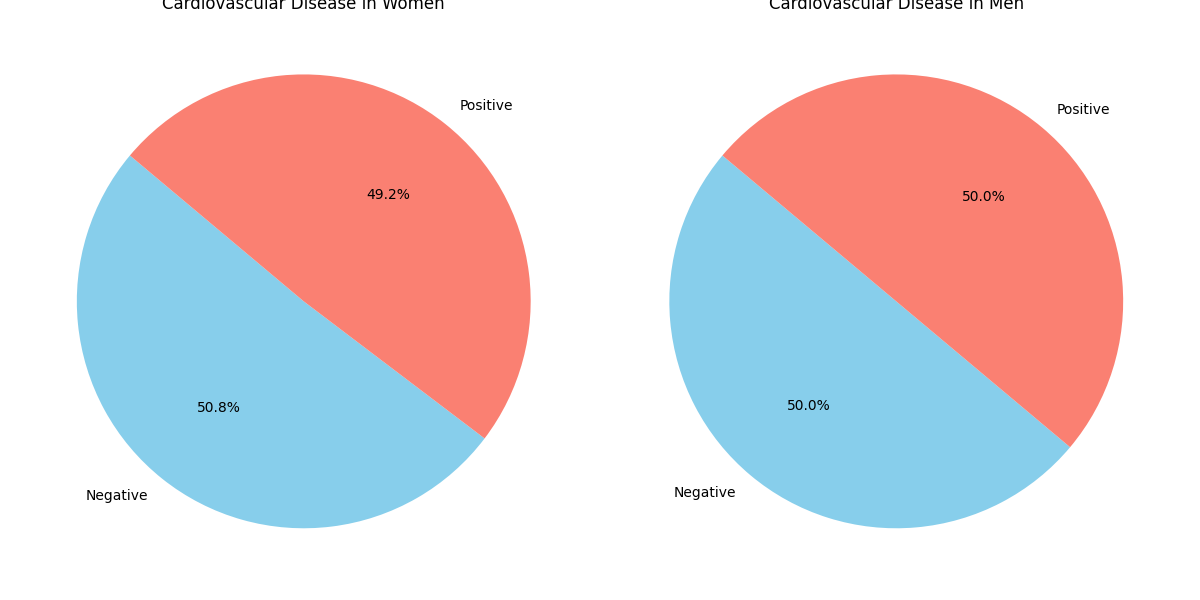

De mest betydelsefulla korrelationerna med förekomst av hjärt- och kärlsjukdomar återfinns i högt och lågt blodtryck (ap_hi och ap_lo), följt av kolesterolvärden, ålder och vikt. Efter att ha utfört analys på två dataset, ett med feature engineering gällande BMI-kategori och blodtrycks-kategori och ett där bara BMI lades till, visade det sig att datasetet med enbart BMI gav bättre prediktioner än det med olika kategorier. Detta trots att kategoriseringen visar att desto högre värden desto större risk för att drabbas av hjärt- och kärlsjukdom.

*BMI-Kategorier* 

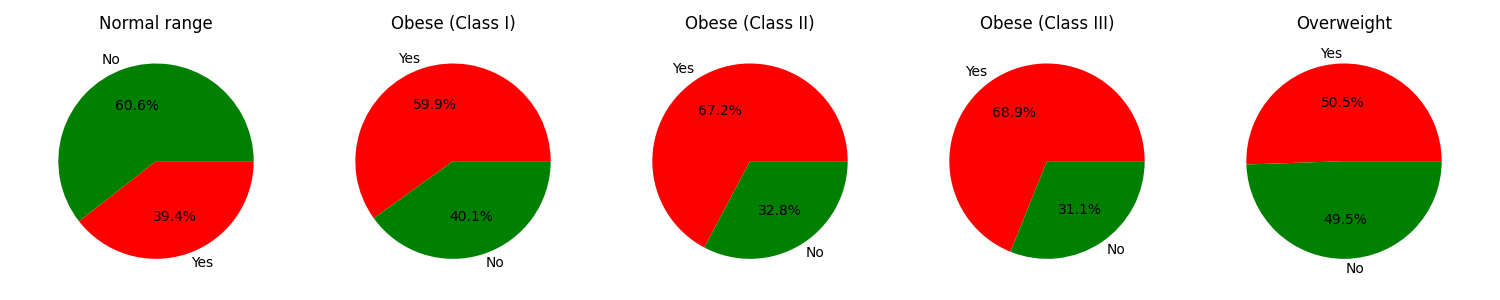

*Blodtryckskategorier*

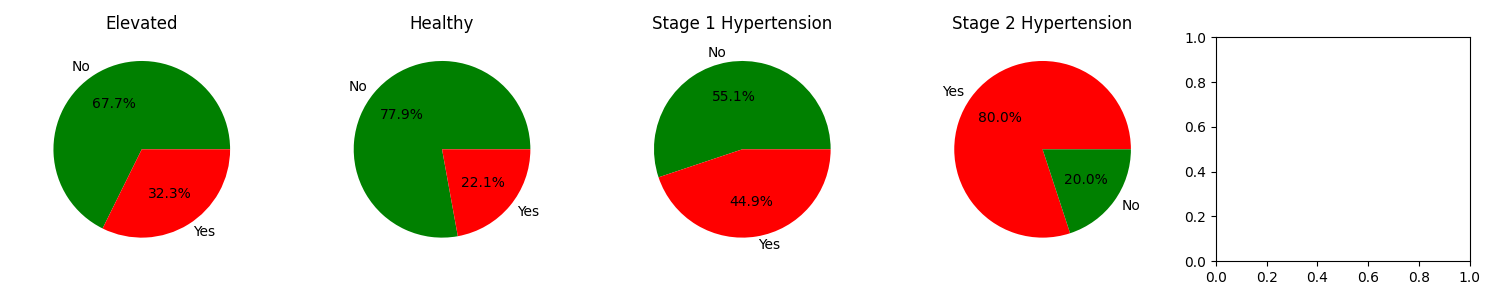

Enligt [Aleris](https://www.aleris.se/overvikt/rakna-ut-ditt-bmi/) anses kraftig undervikt för en kvinna vara under BMI 16. Därför har den nedre gränsen för BMI-kategorierna satts vid 12 och den övre vid 60, eftersom fetma grad 3 kan anses vara över 40 enligt [FHM](https://www.folkhalsomyndigheten.se/nyheter-och-press/nyhetsarkiv/2023/mars/fortsatt-okning-av-fetma-och-overvikt/). Det är fler personer som kan leva med ett högt BMI än ett alltför lågt.

Nedan är de slutgiltiga kolumner som valdes för att använda i framtagandet av en anpassad modell. Kolumnerna visas i en korrelaionsplot, desto närmare 1 eller -1, desto starkare positiv eller negativ korrelation.

![Final Dataset.png](<attachment:Final Dataset.png>)
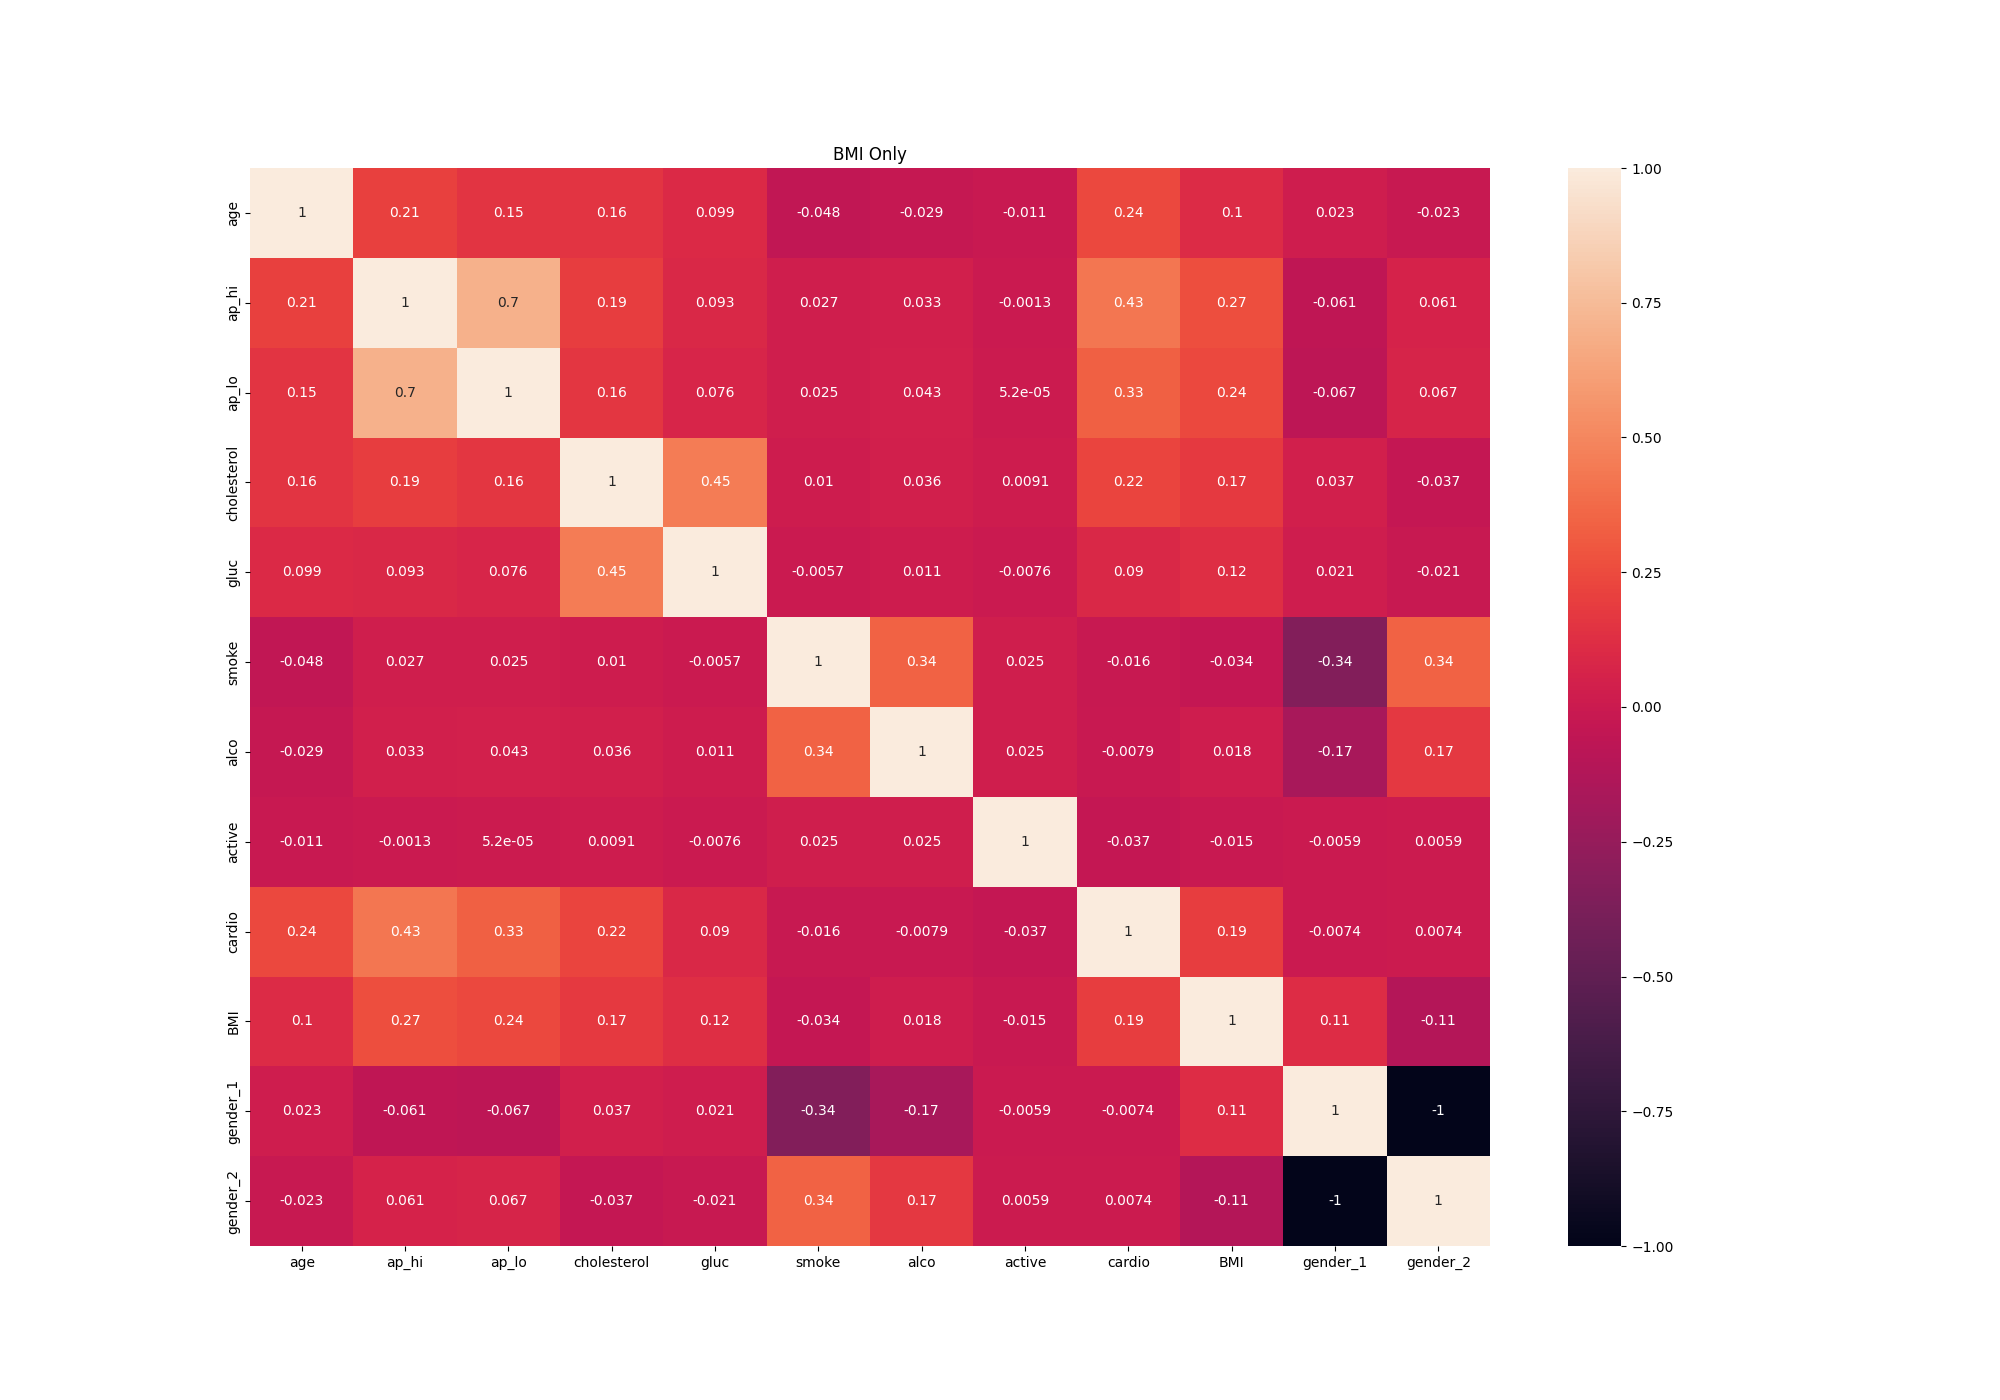

### Modell 

Under det inledande skedet granskades tre algoritmer: Random Forest, Gradient Boosting och K-Nearest Neighbors. Genom användning av GridSearch utfördes en analys för att identifiera de optimala hyperparametrarna. Det dataset som framstod med den högsta noggrannheten var det där ett BMI-värde hade inkluderats.

De mest precisa förutsägelserna uppnåddes med Random Forest och Gradient Boosting på datasetet "Endast BMI". Dessa algoritmer demonstrerade högst noggrannhet och identifierade flest positiva förutsägelser. Med tanke på vikten av att upptäcka positiva fall i detta sammanhang valdes Random Forest, som visade något högre precision i testet.

#### Best Parameters for Random Forest
- **max_depth**: 10
- **n_estimators**: 50

##### Evaluation Result for Random Forest on Only BMI
|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.72      | 0.78   | 0.75     | 10545   |
| 1            | 0.75      | 0.68   | 0.71     | 10069   |
| **accuracy** |           |        | 0.73     | 20614   |
| **macro avg**| 0.73      | 0.73   | 0.73     | 20614   |
| **weighted avg**| 0.73   | 0.73   | 0.73     | 20614   |


Random Forest är en ensemblemetod som används för både klassificering och regression. Metoden konstruerar flera beslutsträd under träning, där varje träd tränas på en slumpmässigt utvald delmängd av träningsdata och använder en delmängd av funktioner för att göra beslut vid varje nod. Efter träningen sammanfattas resultaten från alla träd för att ge det slutliga resultatet genom majoritetsomröstning för klassificering som i detta fallet eller genomsnittligt svar för regression. När Random Forest är tränad, kan den användas för att göra förutsägelser på nya data genom att använda medelvärdet eller majoritetsomröstningen från alla träd i skogen.

Till modellen har hyperparametrarna max_depth: 10 och n_estimators: 200 valts. Max_depth är en hyperparameter som anger det maximala djupet på varje beslutsträd i den slumpmässiga skogen. Ett högre värde innebär att trädet får lov att växa djupare, vilket kan leda till mer komplexa modeller. Det kan också öka risken för överanpassning om det inte regleras ordentligt. Att begränsa djupet kan hjälpa till att förhindra överanpassning och göra modellen mer generaliserbar. N_estimators är antalet beslutsträd som ska ingå i den slumpmässiga skogen. Varje träd i skogen bidrar till den slutliga förutsägelsen genom att rösta på resultatet. En högre mängd träd kan göra modellen mer robust och minska risken för överanpassning, men det ökar också beräkningskostnaden och kan göra modellen långsammare att träna och använda.

Fördelarna med Random Forest inkluderar dess kapacitet att hantera högdimensionella data, dess motståndskraft mot överanpassning och dess flexibilitet för både klassificering och regression. Dessutom kan det ge insikter i vilka funktioner som är viktiga för klassificeringen eller prediktionen.

Nedan framgår hur modellen presterat med korrekta förutsägelser i 80 % av fallen från vårt mindre testdataset.

Antal korrekta förutsägelser: 80
Accuracy: 0.8


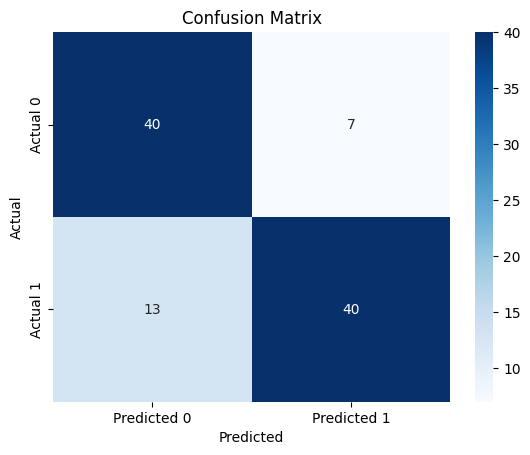

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Läs in testdatan
test_samples = pd.read_csv('../Lab/data/test_samples.csv', index_col=0)

# Läs in prediktionerna från CSV-filen
predictions = pd.read_csv('../Lab/data/prediction.csv')

# Extrahera de faktiska målvariablerna (cardio) från testdatan
actual_values = test_samples['cardio'].reset_index(drop=True)

# Extrahera prediktionerna från den prediktionsfilen
predicted_values = predictions['prediction'].reset_index(drop=True)

# Jämför de faktiska värdena med de förutsagda värdena och räkna antalet korrekta förutsägelser
correct_predictions = sum(actual_values == predicted_values)

# Beräkna andelen korrekta förutsägelser
accuracy = correct_predictions / len(actual_values)

# Skriv ut resultatet
print("Antal korrekta förutsägelser:", correct_predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix

# Extrahera de faktiska målvariablerna (cardio) från testdatan
actual_values = test_samples['cardio']

# Extrahera prediktionerna från den prediktionsfilen
predicted_values = predictions['prediction']

# Beräkna confusion matrix
conf_matrix = confusion_matrix(actual_values, predicted_values)

# Definiera labels för True Positives (TP), True Negatives (TN), False Positives (FP) och False Negatives (FN)
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

# Skapa en seaborn heatmap för att visualisera confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Visa plotten
plt.show()

### Diskussion   
I den tidigare analysen har det observerats att den valda algoritmen uppnår en noggrannhet på 80%, vilket är förhållandevis lågt för klinisk användning på grund av risken för felaktiga prognoser som kan få allvarliga konsekvenser. Den missade dessutom fler positiva fall än negativa, det hade varit önskvärt att det var det mosatta förhållandet. 

Det är troligt att andra modeller skulle kunna prestera bättre än de tre valda för analysen. Ett alternativ skulle kunna vara Support Vector Machines (SVM), en modell som är särskilt effektiv för att hantera högdimensionella data genom att skapa en hyperplan som separerar klasserna i datan. SVM är särskilt lämplig för att hantera komplexa data där det finns en tydlig separation mellan klasserna. Alternativt kan Neurala nätverk vara ett annat alternativ, eftersom de är djupa inlärningsmodeller som kan anpassa sig till komplexa mönster i datan och hantera stora mängder förklaringsvariabler.

I datasetet observerades en sned fördelning där antalet kvinnor var fler än antalet män, vilket kan vara en förklaring till den låga noggrannheten trots hyperparameteroptimering. Eftersom kvinnors och mäns kroppar inte bara skiljer sig åt visuellt utan också kan fungera olika, kan det vara av värde att skapa en separat modell som enbart tränats på data från kvinnor och en annan enbart för män.

Det är dock värt att notera att modellen ändå svarade korrekt i 80% av fallen, vilket skulle kunna göra att den åtminstone kan fungera som en grov uppskattning. Vad som också är tydligt i dataanalysen är att högt blodtryck och övervikt utgör betydande riskfaktorer för hjärt- och kärlsjukdomar.